### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("norm.csv")

In [3]:
df

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,0.136726,0.197639,0.182411,0.278858,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462
1,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,0.162106,0.192563,0.299162,0.278858,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757
2,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,-0.122158,-0.076472,-0.152614,-0.142462,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995
3,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,-0.147538,-0.132310,-0.142462,-0.137386,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158
4,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,0.187487,0.283934,0.243325,0.289010,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,-0.203376,-0.193224,-0.228757,-0.208452,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680
361,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,0.141802,0.101193,0.136726,0.157030,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995
362,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,0.111345,0.258553,0.339771,0.197639,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843
363,-0.162767,-0.213528,-0.162767,-0.238909,-0.172919,-0.183071,-0.137386,-0.188147,-0.117081,0.045355,0.207792,0.172259,0.253477,0.314391,0.273781,0.217944,0.324543,0.304238,0.121497,-0.040939,-0.071396,-0.051092,-0.061244,-0.152614


In [4]:
df.shape

(365, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   00:00:00  365 non-null    float64
 1   01:00:00  365 non-null    float64
 2   02:00:00  364 non-null    float64
 3   03:00:00  365 non-null    float64
 4   04:00:00  365 non-null    float64
 5   05:00:00  365 non-null    float64
 6   06:00:00  365 non-null    float64
 7   07:00:00  365 non-null    float64
 8   08:00:00  365 non-null    float64
 9   09:00:00  365 non-null    float64
 10  10:00:00  365 non-null    float64
 11  11:00:00  365 non-null    float64
 12  12:00:00  365 non-null    float64
 13  13:00:00  365 non-null    float64
 14  14:00:00  365 non-null    float64
 15  15:00:00  365 non-null    float64
 16  16:00:00  365 non-null    float64
 17  17:00:00  365 non-null    float64
 18  18:00:00  365 non-null    float64
 19  19:00:00  365 non-null    float64
 20  20:00:00  365 non-null    float6

In [6]:
df.fillna(value=0.0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   00:00:00  365 non-null    float64
 1   01:00:00  365 non-null    float64
 2   02:00:00  365 non-null    float64
 3   03:00:00  365 non-null    float64
 4   04:00:00  365 non-null    float64
 5   05:00:00  365 non-null    float64
 6   06:00:00  365 non-null    float64
 7   07:00:00  365 non-null    float64
 8   08:00:00  365 non-null    float64
 9   09:00:00  365 non-null    float64
 10  10:00:00  365 non-null    float64
 11  11:00:00  365 non-null    float64
 12  12:00:00  365 non-null    float64
 13  13:00:00  365 non-null    float64
 14  14:00:00  365 non-null    float64
 15  15:00:00  365 non-null    float64
 16  16:00:00  365 non-null    float64
 17  17:00:00  365 non-null    float64
 18  18:00:00  365 non-null    float64
 19  19:00:00  365 non-null    float64
 20  20:00:00  365 non-null    float6

In [8]:
X = df.iloc[:,0:23]

In [9]:
X.values

array([[-0.17291903, -0.23890887, -0.19829974, ..., -0.11200532,
        -0.12215761, -0.14753832],
       [-0.16276674, -0.15261446, -0.15261446, ..., -0.17799517,
        -0.17291903, -0.21352816],
       [-0.22368045, -0.16784288, -0.1576906 , ..., -0.16276674,
        -0.12215761, -0.1932236 ],
       ...,
       [-0.27444187, -0.20845202, -0.22875659, ..., -0.01555862,
        -0.20845202, -0.20845202],
       [-0.16276674, -0.21352816, -0.16276674, ..., -0.07139618,
        -0.05109162, -0.0612439 ],
       [-0.14246217, -0.18307131, -0.25921344, ..., -0.13230989,
        -0.08154847, -0.13738603]])

### Use Dendogram

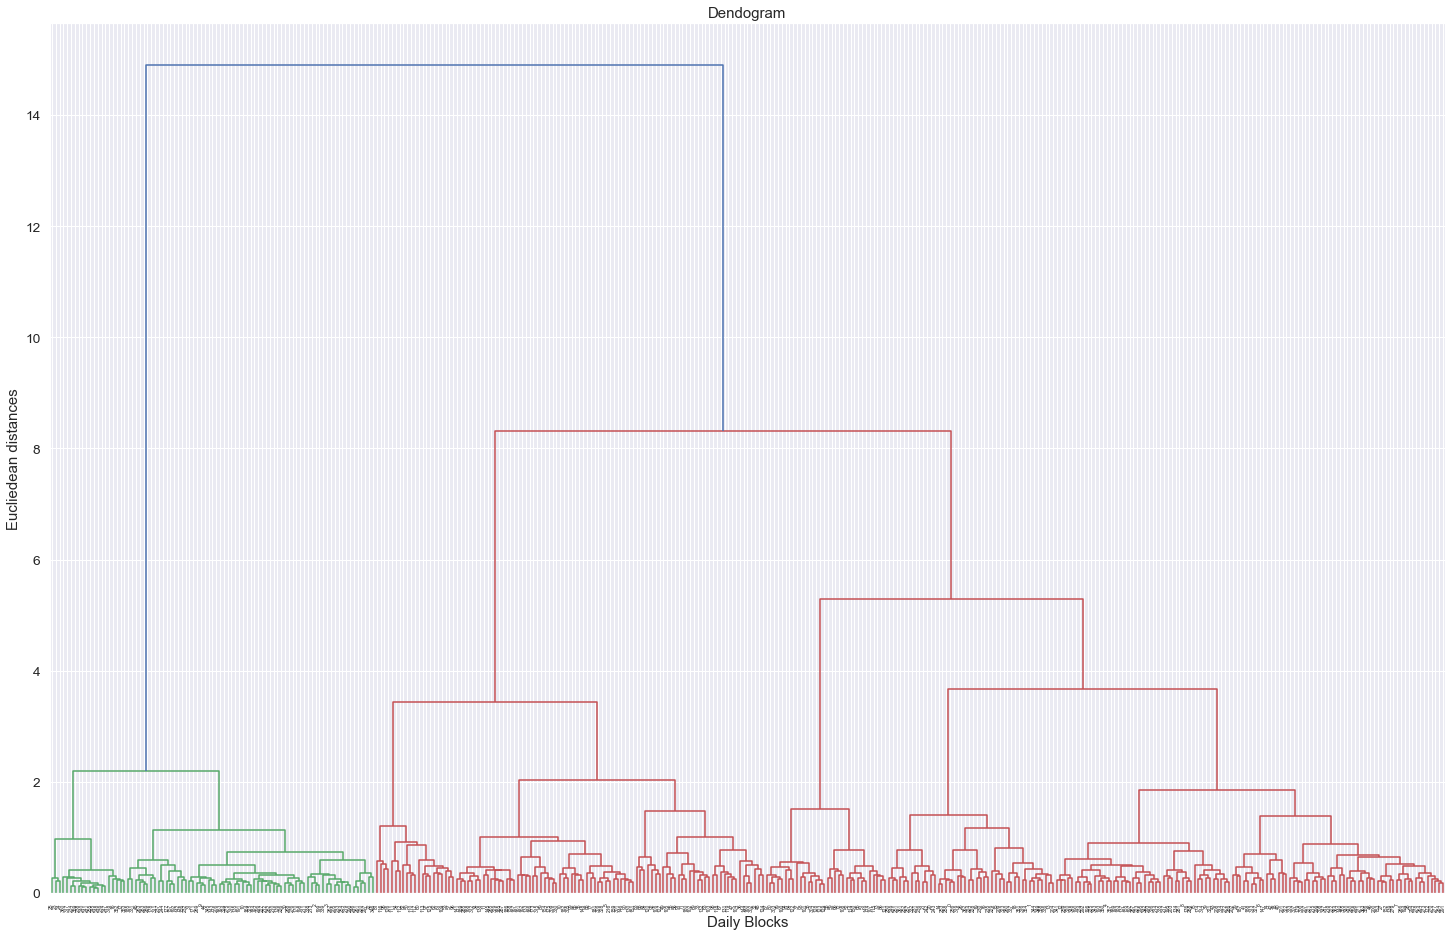

In [10]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=None)
plt.title("Dendogram")
plt.xlabel("Daily Blocks")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [11]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(X)

In [13]:
y_hc

array([0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [14]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [15]:
y

,Cluster
0,0
1,0
2,1
3,1
4,0
...,...
360,1
361,0
362,0
363,0


In [16]:
y['Cluster'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
y['Cluster'].value_counts()

0    178
2    102
1     85
Name: Cluster, dtype: int64

In [18]:
newdf = pd.concat([df,y],axis=1)

In [19]:
newdf

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Cluster
0,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,0.136726,0.197639,0.182411,0.278858,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462,0
1,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,0.162106,0.192563,0.299162,0.278858,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757,0
2,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,-0.122158,-0.076472,-0.152614,-0.142462,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995,1
3,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,-0.147538,-0.132310,-0.142462,-0.137386,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158,1
4,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,0.187487,0.283934,0.243325,0.289010,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,-0.203376,-0.193224,-0.228757,-0.208452,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680,1
361,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,0.141802,0.101193,0.136726,0.157030,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995,0
362,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,0.111345,0.258553,0.339771,0.197639,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843,0
363,-0.162767,-0.213528,-0.162767,-0.238909,-0.172919,-0.183071,-0.137386,-0.188147,-0.117081,0.045355,0.207792,0.172259,0.253477,0.314391,0.273781,0.217944,0.324543,0.304238,0.121497,-0.040939,-0.071396,-0.051092,-0.061244,-0.152614,0


In [20]:
meandf = newdf.groupby(by='Cluster').mean()

In [21]:
meandf

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.130086,-0.138955,-0.142091,-0.145057,-0.152329,-0.145998,-0.139126,-0.135589,-0.068202,0.065831,0.154834,0.194987,0.209046,0.218942,0.236252,0.230292,0.195757,0.113940,0.016267,-0.037375,-0.065122,-0.085370,-0.102766,-0.115513
1,-0.184445,-0.190954,-0.187487,-0.194657,-0.194000,-0.192268,-0.200927,-0.196926,-0.197344,-0.181578,-0.166947,-0.142880,-0.141148,-0.136371,-0.134042,-0.137625,-0.135893,-0.151181,-0.162050,-0.165633,-0.170709,-0.178115,-0.185281,-0.191372
2,-0.034918,-0.041785,-0.054575,-0.060995,-0.062239,-0.052037,-0.054774,-0.050295,0.034606,0.219051,0.349546,0.417874,0.427791,0.455745,0.472155,0.456092,0.406471,0.287766,0.149366,0.069641,0.039483,0.019377,0.000466,-0.015957


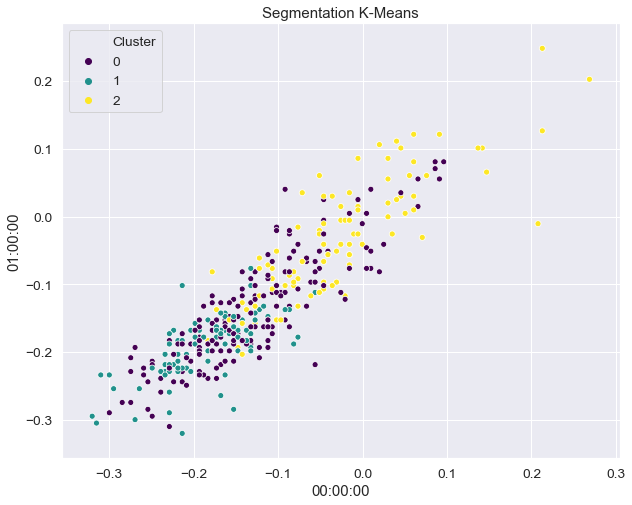

In [22]:
x_axis = newdf['00:00:00']
y_axis = newdf['01:00:00']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

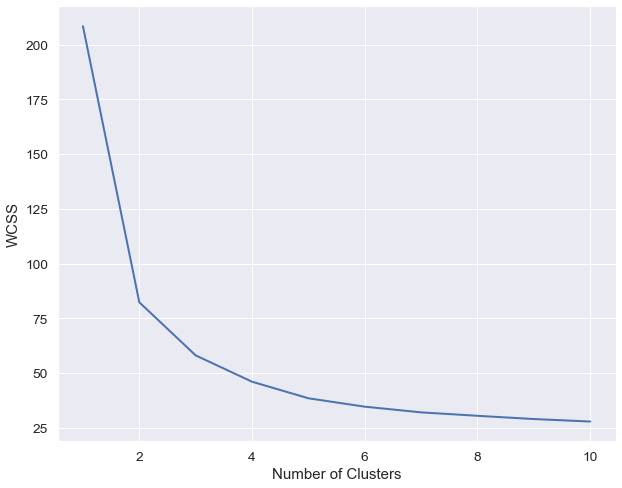

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [25]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [27]:
df_segm_kmeans = df.copy()

In [28]:
df_segm_kmeans

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,0.136726,0.197639,0.182411,0.278858,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462
1,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,0.162106,0.192563,0.299162,0.278858,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757
2,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,-0.122158,-0.076472,-0.152614,-0.142462,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995
3,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,-0.147538,-0.132310,-0.142462,-0.137386,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158
4,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,0.187487,0.283934,0.243325,0.289010,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,-0.203376,-0.193224,-0.228757,-0.208452,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680
361,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,0.141802,0.101193,0.136726,0.157030,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995
362,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,0.111345,0.258553,0.339771,0.197639,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843
363,-0.162767,-0.213528,-0.162767,-0.238909,-0.172919,-0.183071,-0.137386,-0.188147,-0.117081,0.045355,0.207792,0.172259,0.253477,0.314391,0.273781,0.217944,0.324543,0.304238,0.121497,-0.040939,-0.071396,-0.051092,-0.061244,-0.152614


In [29]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [30]:
df_segm_kmeans

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Segment K-Means
0,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,0.136726,0.197639,0.182411,0.278858,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462,0
1,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,0.162106,0.192563,0.299162,0.278858,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757,0
2,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,-0.122158,-0.076472,-0.152614,-0.142462,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995,2
3,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,-0.147538,-0.132310,-0.142462,-0.137386,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158,2
4,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,0.187487,0.283934,0.243325,0.289010,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,-0.203376,-0.193224,-0.228757,-0.208452,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680,2
361,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,0.141802,0.101193,0.136726,0.157030,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995,0
362,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,0.111345,0.258553,0.339771,0.197639,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843,0
363,-0.162767,-0.213528,-0.162767,-0.238909,-0.172919,-0.183071,-0.137386,-0.188147,-0.117081,0.045355,0.207792,0.172259,0.253477,0.314391,0.273781,0.217944,0.324543,0.304238,0.121497,-0.040939,-0.071396,-0.051092,-0.061244,-0.152614,0


In [31]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [32]:
df_segm_analysis

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Segment K-Means,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.137352,-0.145891,-0.147874,-0.150732,-0.158262,-0.151102,-0.143639,-0.137655,-0.066992,0.080619,0.173671,0.216835,0.228869,0.239694,0.259629,0.249342,0.209271,0.120253,0.015537,-0.042418,-0.070186,-0.092003,-0.110190,-0.123401
1,-0.039647,-0.046985,-0.059767,-0.065028,-0.065213,-0.058106,-0.060183,-0.055937,0.030773,0.210895,0.342560,0.408687,0.420190,0.447264,0.463819,0.452339,0.407665,0.290210,0.150754,0.072305,0.042725,0.020159,0.000823,-0.016297
2,-0.166281,-0.173358,-0.172037,-0.179557,-0.181558,-0.177214,-0.183852,-0.183315,-0.179362,-0.161010,-0.143097,-0.120303,-0.114739,-0.110834,-0.109662,-0.111468,-0.112396,-0.127868,-0.140119,-0.145928,-0.155543,-0.160424,-0.167745,-0.173358


In [33]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','00:00:00']].groupby(['Segment K-Means']).count()

In [34]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [35]:
df_segm_analysis

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.137352,-0.145891,-0.147874,-0.150732,-0.158262,-0.151102,-0.143639,-0.137655,-0.066992,0.080619,0.173671,0.216835,0.228869,0.239694,0.259629,0.249342,0.209271,0.120253,0.015537,-0.042418,-0.070186,-0.092003,-0.110190,-0.123401,151,0.413699
1,-0.039647,-0.046985,-0.059767,-0.065028,-0.065213,-0.058106,-0.060183,-0.055937,0.030773,0.210895,0.342560,0.408687,0.420190,0.447264,0.463819,0.452339,0.407665,0.290210,0.150754,0.072305,0.042725,0.020159,0.000823,-0.016297,110,0.301370
2,-0.166281,-0.173358,-0.172037,-0.179557,-0.181558,-0.177214,-0.183852,-0.183315,-0.179362,-0.161010,-0.143097,-0.120303,-0.114739,-0.110834,-0.109662,-0.111468,-0.112396,-0.127868,-0.140119,-0.145928,-0.155543,-0.160424,-0.167745,-0.173358,104,0.284932


In [36]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                        },inplace=True)

In [37]:
df_segm_analysis

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,,,,,,,,,,,,,,
A,-0.137352,-0.145891,-0.147874,-0.150732,-0.158262,-0.151102,-0.143639,-0.137655,-0.066992,0.080619,0.173671,0.216835,0.228869,0.239694,0.259629,0.249342,0.209271,0.120253,0.015537,-0.042418,-0.070186,-0.092003,-0.110190,-0.123401,151,0.413699
B,-0.039647,-0.046985,-0.059767,-0.065028,-0.065213,-0.058106,-0.060183,-0.055937,0.030773,0.210895,0.342560,0.408687,0.420190,0.447264,0.463819,0.452339,0.407665,0.290210,0.150754,0.072305,0.042725,0.020159,0.000823,-0.016297,110,0.301370
C,-0.166281,-0.173358,-0.172037,-0.179557,-0.181558,-0.177214,-0.183852,-0.183315,-0.179362,-0.161010,-0.143097,-0.120303,-0.114739,-0.110834,-0.109662,-0.111468,-0.112396,-0.127868,-0.140119,-0.145928,-0.155543,-0.160424,-0.167745,-0.173358,104,0.284932


In [38]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  })

In [39]:
df_segm_kmeans

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Segment K-Means,Labels
0,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,0.136726,0.197639,0.182411,0.278858,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462,0,A
1,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,0.162106,0.192563,0.299162,0.278858,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757,0,A
2,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,-0.122158,-0.076472,-0.152614,-0.142462,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995,2,C
3,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,-0.147538,-0.132310,-0.142462,-0.137386,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158,2,C
4,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,0.187487,0.283934,0.243325,0.289010,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,-0.203376,-0.193224,-0.228757,-0.208452,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680,2,C
361,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,0.141802,0.101193,0.136726,0.157030,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995,0,A
362,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,0.111345,0.258553,0.339771,0.197639,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843,0,A
363,-0.162767,-0.213528,-0.162767,-0.238909,-0.172919,-0.183071,-0.137386,-0.188147,-0.117081,0.045355,0.207792,0.172259,0.253477,0.314391,0.273781,0.217944,0.324543,0.304238,0.121497,-0.040939,-0.071396,-0.051092,-0.061244,-0.152614,0,A


### Plot the clusters

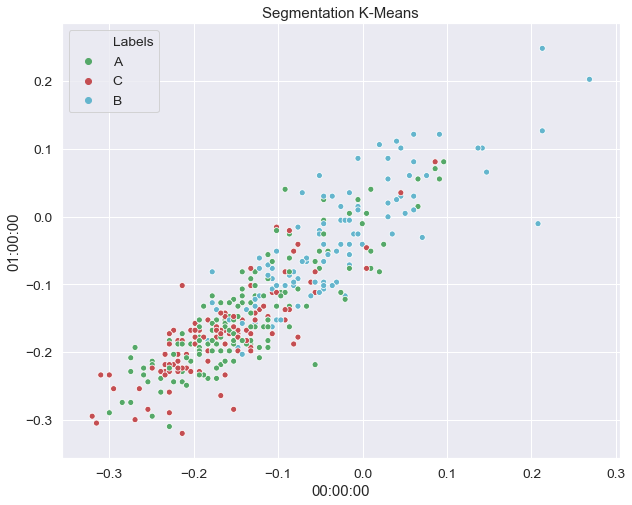

In [40]:
x_axis = df_segm_kmeans['00:00:00']
y_axis = df_segm_kmeans['01:00:00']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c'])
plt.title('Segmentation K-Means')
plt.show()

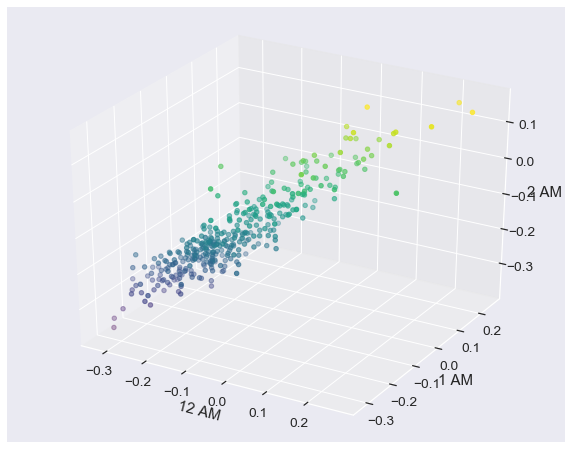

In [41]:
x_axis = df_segm_kmeans['00:00:00']
y_axis = df_segm_kmeans['01:00:00']
z_axis = df_segm_kmeans['02:00:00']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('12 AM')
ax.set_ylabel('1 AM')
ax.set_zlabel('2 AM')

plt.show()

For each cluster, calculate the hourly **mean and standard deviation**, and plot the **mean** and the **standard deviation** in a duplicate visualization to the following graphic, except with three clusters instead of four.

In [42]:
df_segm_analysis

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,,,,,,,,,,,,,,
A,-0.137352,-0.145891,-0.147874,-0.150732,-0.158262,-0.151102,-0.143639,-0.137655,-0.066992,0.080619,0.173671,0.216835,0.228869,0.239694,0.259629,0.249342,0.209271,0.120253,0.015537,-0.042418,-0.070186,-0.092003,-0.110190,-0.123401,151,0.413699
B,-0.039647,-0.046985,-0.059767,-0.065028,-0.065213,-0.058106,-0.060183,-0.055937,0.030773,0.210895,0.342560,0.408687,0.420190,0.447264,0.463819,0.452339,0.407665,0.290210,0.150754,0.072305,0.042725,0.020159,0.000823,-0.016297,110,0.301370
C,-0.166281,-0.173358,-0.172037,-0.179557,-0.181558,-0.177214,-0.183852,-0.183315,-0.179362,-0.161010,-0.143097,-0.120303,-0.114739,-0.110834,-0.109662,-0.111468,-0.112396,-0.127868,-0.140119,-0.145928,-0.155543,-0.160424,-0.167745,-0.173358,104,0.284932


In [43]:
df_segm_analysis.columns

Index(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00',
       '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00',
       '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00',
       '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00',
       'NoofObservations', 'ProportionofObservations'],
      dtype='object')

In [44]:
df_segm_analysis.drop(['NoofObservations', 'ProportionofObservations'],axis=1,inplace=True)

In [45]:
df_segm_analysis.describe()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,-0.114427,-0.122078,-0.126560,-0.131772,-0.135011,-0.128807,-0.129225,-0.125636,-0.071860,0.043501,0.124378,0.168406,0.178107,0.192041,0.204595,0.196738,0.168180,0.094198,0.008724,-0.038680,-0.061001,-0.077423,-0.092371,-0.104352
std,0.066357,0.066467,0.059092,0.059572,0.061559,0.062606,0.063082,0.064534,0.105152,0.188710,0.246552,0.267799,0.271053,0.282084,0.290675,0.285561,0.262454,0.210253,0.145556,0.109164,0.099452,0.091170,0.085685,0.080245
min,-0.166281,-0.173358,-0.172037,-0.179557,-0.181558,-0.177214,-0.183852,-0.183315,-0.179362,-0.161010,-0.143097,-0.120303,-0.114739,-0.110834,-0.109662,-0.111468,-0.112396,-0.127868,-0.140119,-0.145928,-0.155543,-0.160424,-0.167745,-0.173358
25%,-0.151817,-0.159625,-0.159956,-0.165144,-0.169910,-0.164158,-0.163746,-0.160485,-0.123177,-0.040195,0.015287,0.048266,0.057065,0.064430,0.074983,0.068937,0.048437,-0.003807,-0.062291,-0.094173,-0.112864,-0.126214,-0.138968,-0.148380
50%,-0.137352,-0.145891,-0.147874,-0.150732,-0.158262,-0.151102,-0.143639,-0.137655,-0.066992,0.080619,0.173671,0.216835,0.228869,0.239694,0.259629,0.249342,0.209271,0.120253,0.015537,-0.042418,-0.070186,-0.092003,-0.110190,-0.123401
75%,-0.088500,-0.096438,-0.103821,-0.107880,-0.111737,-0.104604,-0.101911,-0.096796,-0.018110,0.145757,0.258115,0.312761,0.324530,0.343479,0.361724,0.350841,0.308468,0.205232,0.083146,0.014943,-0.013731,-0.035922,-0.054683,-0.069849
max,-0.039647,-0.046985,-0.059767,-0.065028,-0.065213,-0.058106,-0.060183,-0.055937,0.030773,0.210895,0.342560,0.408687,0.420190,0.447264,0.463819,0.452339,0.407665,0.290210,0.150754,0.072305,0.042725,0.020159,0.000823,-0.016297


In [46]:
df_segm_analysis.mean(axis=0)

00:00:00   -0.114427
01:00:00   -0.122078
02:00:00   -0.126560
03:00:00   -0.131772
04:00:00   -0.135011
05:00:00   -0.128807
06:00:00   -0.129225
07:00:00   -0.125636
08:00:00   -0.071860
09:00:00    0.043501
10:00:00    0.124378
11:00:00    0.168406
12:00:00    0.178107
13:00:00    0.192041
14:00:00    0.204595
15:00:00    0.196738
16:00:00    0.168180
17:00:00    0.094198
18:00:00    0.008724
19:00:00   -0.038680
20:00:00   -0.061001
21:00:00   -0.077423
22:00:00   -0.092371
23:00:00   -0.104352
dtype: float64

In [47]:
df_segm_analysis.std(axis=0)

00:00:00    0.066357
01:00:00    0.066467
02:00:00    0.059092
03:00:00    0.059572
04:00:00    0.061559
05:00:00    0.062606
06:00:00    0.063082
07:00:00    0.064534
08:00:00    0.105152
09:00:00    0.188710
10:00:00    0.246552
11:00:00    0.267799
12:00:00    0.271053
13:00:00    0.282084
14:00:00    0.290675
15:00:00    0.285561
16:00:00    0.262454
17:00:00    0.210253
18:00:00    0.145556
19:00:00    0.109164
20:00:00    0.099452
21:00:00    0.091170
22:00:00    0.085685
23:00:00    0.080245
dtype: float64

In [48]:
meandf = pd.DataFrame(data=df_segm_analysis.mean(axis=0),columns=['Mean'])

In [49]:
meandf

,Mean
00:00:00,-0.114427
01:00:00,-0.122078
02:00:00,-0.126560
03:00:00,-0.131772
04:00:00,-0.135011
05:00:00,-0.128807
06:00:00,-0.129225
07:00:00,-0.125636
08:00:00,-0.071860
09:00:00,0.043501


In [50]:
stddf = pd.DataFrame(data=df_segm_analysis.std(axis=0),columns=['StdDev'])

In [51]:
stddf

,StdDev
00:00:00,0.066357
01:00:00,0.066467
02:00:00,0.059092
03:00:00,0.059572
04:00:00,0.061559
05:00:00,0.062606
06:00:00,0.063082
07:00:00,0.064534
08:00:00,0.105152
09:00:00,0.188710


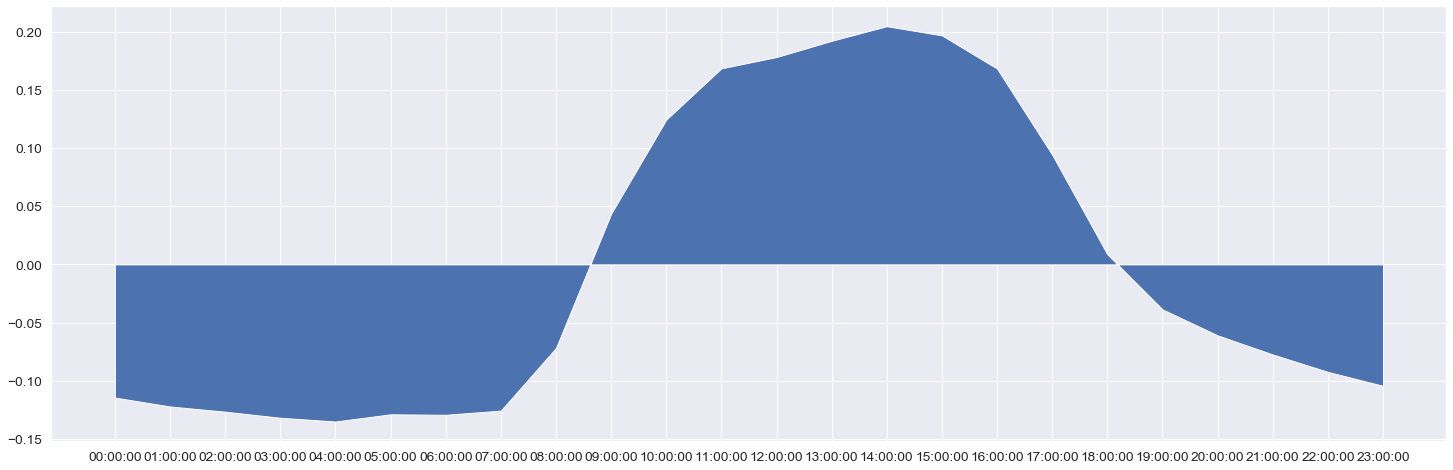

In [52]:
plt.figure(figsize=(25,8))
plt.fill_between(x=meandf.index,y1=meandf.Mean);

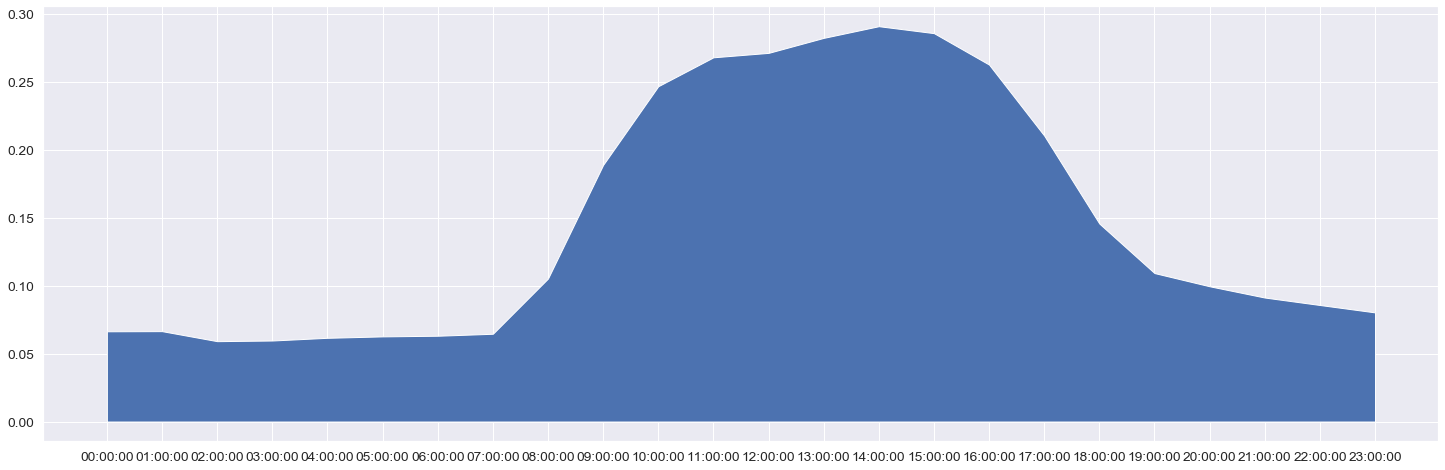

In [53]:
plt.figure(figsize=(25,8))
plt.fill_between(x=stddf.index,y1=stddf.StdDev);

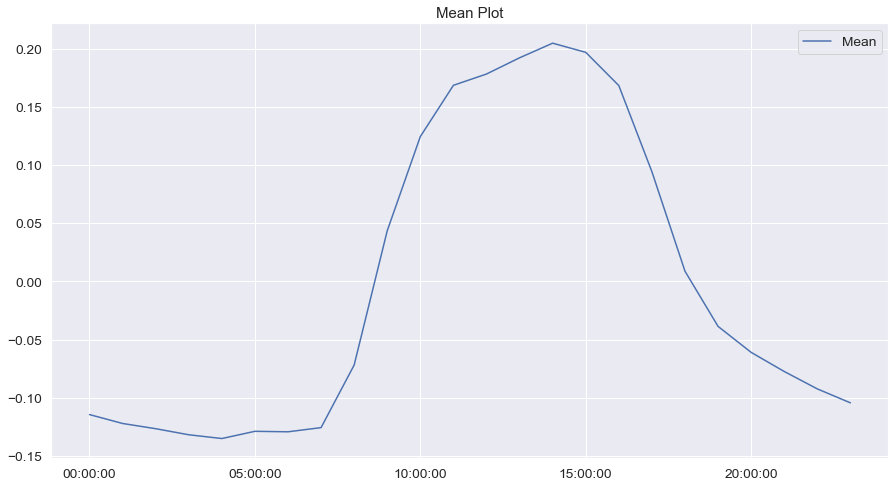

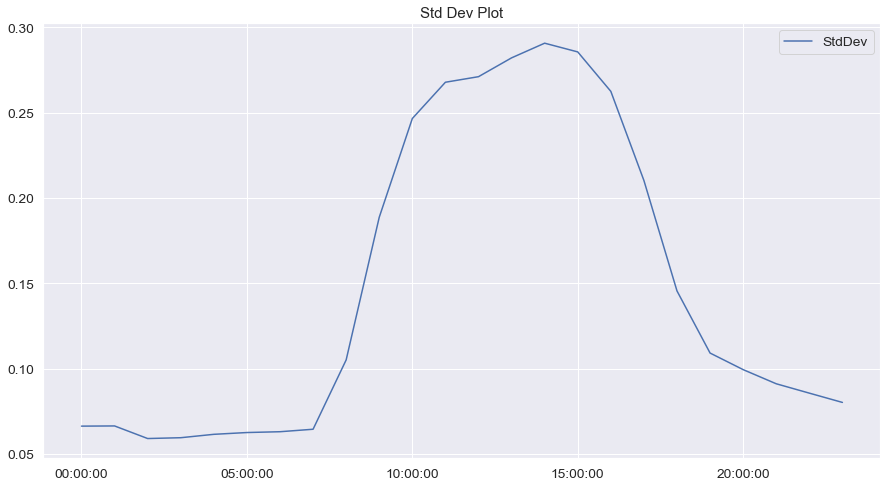

In [54]:
meandf.plot(figsize=(15,8), title="Mean Plot");
stddf.plot(figsize=(15,8), title="Std Dev Plot");